In [ ]:
# 7.2 Exercise
# Dimensionality Reduction and Feature Selection
## Justin Wisniewski

In [1]:
# Part 1: PCA and Variance Threshold in a Linear Regression
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in the housing dataset
df = pd.read_csv('housing_data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Drop the "Id" column and any features that are missing more than 40% of their values
df.drop(['Id'], axis=1, inplace=True)
df.dropna(axis=1, thresh=len(df)*.4, inplace=True)

In [5]:
# For numerical columns, fill in any missing data with the median value
# For categorical columns, fill in any missing data with the most common value (mode)
def fill_missing(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)
    return df

df = fill_missing(df)

In [6]:
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [7]:
# Convert the categorical columns to dummy variables
df = pd.get_dummies(df, drop_first=True)

In [8]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [9]:
# Split the data into a training and test set, where the SalePrice column is the target
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# Run a linear regression and report the R2-value and RMSE on the test set
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [12]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)
y_pred = model_linear_regression.predict(X_test)

In [13]:
# Calculate the RMSE and R2-value
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 47734.041338584066
R2: 0.6643774377493656


In [14]:
# Fit and transform the training features with a PCA so that 90% of the variance is retained
from sklearn.decomposition import PCA
pca = PCA(.9)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [15]:
# How many features are in the PCA-transformed matrix
print(f'Number of features in PCA-transformed matrix: {X_train_pca.shape[1]}')

Number of features in PCA-transformed matrix: 1


In [16]:
# Repeat step 7 with PCA transformed data
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_pca, y_train)
y_pred = model_linear_regression.predict(X_test_pca)

In [17]:
mean_squared_error_pca = np.sqrt(mean_squared_error(y_test, y_pred))
r2_pca = r2_score(y_test, y_pred)
print(f'RMSE: {mean_squared_error_pca}')
print(f'R2: {r2_pca}')

RMSE: 79269.9564392479
R2: 0.07442422802806481


In [18]:
# Take original training features (from step 6) and apply min-max scaler to them
# Find min-max scaled features in training set that have a variance above 0.1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12
# Repeat step 7 with the high variance data
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_scaled, y_train)
y_pred = model_linear_regression.predict(X_test_scaled)

In [20]:
mean_squared_error_scaled = np.sqrt(mean_squared_error(y_test, y_pred))
r2_scaled = r2_score(y_test, y_pred)
print(f'RMSE: {mean_squared_error_scaled}')
print(f'R2: {r2_scaled}')

RMSE: 1913712156766140.0
R2: -5.394459914704186e+20


In [ ]:
# Higher R2 value, better the model fits dataset
# The RMSE tells us how well a regression model can predict the value of the response variable in absolute terms

In [21]:
# Part 2: Categorical Feature Selection
from sklearn.utils import shuffle
import pickle

In [22]:
# Read in the mushroom dataset
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [24]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Label encoder knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['class'] = label_encoder.fit_transform(df['class'])
#df.apply(Label Encoder ().fit_transform)

#OneHotEncoder ().fit_transform(df)

df_col=list(df.columns)

for i in range (len (df_col)):
    df[df_col[i]] = LabelEncoder ().fit_transform(df[df_col[i]])
    
print (df.head())

y=df['class']
df = df.drop(['class'], axis=1)

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

In [25]:
# Split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

In [26]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Instantiate the Decision TreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# Fit a decision tree classifier on the training set
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [27]:
# Report the accuracy and create a confusion matrix for the model prediction on the test set
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, y_pred_gini))

Model accuracy score with criterion gini index: 0.9582
[[1226   69]
 [  33 1110]]


[Text(0.5, 0.875, 'X[8] <= 3.5\ngini = 0.5\nsamples = 5686\nvalue = [2913, 2773]'),
 Text(0.25, 0.625, 'X[20] <= 3.5\ngini = 0.269\nsamples = 2349\nvalue = [377, 1972]'),
 Text(0.125, 0.375, 'X[19] <= 1.5\ngini = 0.233\nsamples = 409\nvalue = [354, 55]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.1875, 0.125, 'gini = 0.087\nsamples = 371\nvalue = [354, 17]'),
 Text(0.375, 0.375, 'X[10] <= 2.0\ngini = 0.023\nsamples = 1940\nvalue = [23, 1917]'),
 Text(0.3125, 0.125, 'gini = 0.007\nsamples = 1924\nvalue = [7, 1917]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.75, 0.625, 'X[19] <= 1.5\ngini = 0.365\nsamples = 3337\nvalue = [2536, 801]'),
 Text(0.625, 0.375, 'X[10] <= 0.5\ngini = 0.221\nsamples = 489\nvalue = [62, 427]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 62\nvalue = [62, 0]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 427\nvalue = [0, 427]'),
 Text(0.875, 0.375, 'X[7] <= 0.5\ngini = 0.228\nsamples = 2848\nvalue 

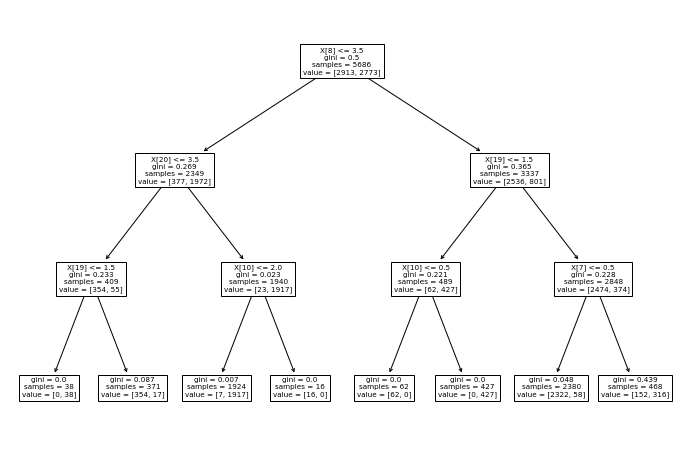

In [28]:
# Create visualization of decision tree

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [31]:
from sklearn. feature_selection import chi2
from sklearn.feature_selection import SelectKBest
# k = 5 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
sel5 = SelectKBest (score_func=chi2, k=5)
#fit= test. fit(x, y)
sel5.fit (df.fillna(0), y)
df.columns[sel5.get_support()].to_numpy()
xxx=sel5.transform(df)
xxx = pd.DataFrame(xxx)

In [35]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(xxx, y, test_size=0.3)
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier (criterion='gini', max_depth=3, random_state=0)
# Fit the model
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(x_test)

from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format (accuracy_score(y_test, y_pred_gini)))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_gini))

Model accuracy score with criterion gini index: 0.8425
[[1122   84]
 [ 300  932]]
